# Práctica 6: Word embeddings fundamentals

<img src="http://ruder.io/content/images/2016/04/word_embeddings_colah.png" width="300" heitgh="300">

## Objetivo

- Explorar representaciones vectoriales de palabras (BoW)
    - Basados en Frecuencias
    - Usando TF-IDF
- Medir la similitud entre dos vectores
- Manipulación de representaciones vectoriales previamente entrenadas

 ## Representaciones vectoriales


- Sabemos que las computadoras son buenas computando numero no textos crudo
  - Especialemente metodos de ML que son los que utilizamos para resolver tareas
  - Clasificacion de documentos
  - Rankear documentos por reelevancia dada una query
- Buscamos una forma de mapear textos -> espacio vectorial
 - Un enfoque muy utilizado es la Bolsa de Palabras (Bag of Words)
   - Matriz de documentos-terminos
   - Cada fila es un vector con $N$ features donde las features serán el vocabulario del corpus

<img src="https%3A%2F%2Fmiro.medium.com%2Fmax%2F600%2F0%2AJpqZhCNsQ_OGaRkB.jpg&sp=1697483747T42078c323ffee8cc60b2ab106bb8c31e070378b6c0d18de0d990385ea2eef91f">

In [192]:
import gensim

In [218]:
doc_1 = "Augusta Ada King, condesa de Lovelace (Londres, 10 de diciembre de 1815-íd., 27 de noviembre de 1852), registrada al nacer como Augusta Ada Byron y conocida habitualmente como Ada Lovelace, fue una matemática y escritora británica, célebre sobre todo por su trabajo acerca de la computadora mecánica de uso general de Charles Babbage, la denominada máquina analítica. Fue la primera en reconocer que la máquina tenía aplicaciones más allá del cálculo puro y en haber publicado lo que se reconoce hoy como el primer algoritmo destinado a ser procesado por una máquina, por lo que se le considera como la primera programadora de ordenadores."
doc_2 = "Brassica oleracea var. italica, el brócoli,1​ brécol2​ o bróquil3​ del italiano broccoli (brote), es una planta de la familia de las brasicáceas. Existen otras variedades de la misma especie, tales como: repollo (B. o. capitata), la coliflor (B. o. botrytis), el colinabo (B. o. gongylodes) y la col de Bruselas (B. o. gemmifera). El llamado brócoli chino o kai-lan (B. o. alboglabra) es también una variedad de Brassica oleracea."
doc_3 = "La bicicleta de piñón fijo, fixie o fixed es una bicicleta monomarcha, que no tiene piñón libre, lo que significa que no tiene punto muerto; es decir, los pedales están siempre en movimiento cuando la bicicleta está en marcha. Esto significa que no se puede dejar de pedalear, ya que, mientras la rueda trasera gire, la cadena y los pedales girarán siempre solidariamente. Por este motivo, se puede frenar haciendo una fuerza inversa al sentido de la marcha, y también ir marcha atrás."
sample_doc = "Las bicicletas fixie, también denominadas bicicletas de piñón fijo, son bicis de una sola marcha, de piñón fijo, y sin punto muerto, por lo que se debe avanzar, frenar y dar marcha atrás con el uso de los pedales. La rueda de atrás gira cuando giran los pedales. Si pedaleas hacia delante, avanzas; si paras los pedales, frenas y si pedaleas hacia atrás, irás marcha atrás. Esto requiere de un entrenamiento añadido que la bicicleta con piñón libre no lo necesita. No obstante, las bicicletas fixie tienen muchísimas ventajas."
#sample_doc = "El brócoli o brécol es una planta de la familia de las brasicáceas, como otras hortalizas que conocemos como coles. Está por tanto emparentado con verduras como la coliflor, el repollo y las diferentes coles lisas o rizadas, incluyendo el kale o las coles de Bruselas."

In [219]:
corpora_simple = [doc_1, doc_2, doc_3, sample_doc]

In [220]:
from gensim.utils import simple_preprocess

def sent_to_words(sentences: list) -> list:
    """Function convert sentences to words

    Use the tokenizer provided by gensim using
    `simple_process()` which remove punctuation and converte
    to lowercase (`deacc=True`)
    """
    return [simple_preprocess(sent, deacc=True) for sent in sentences]


In [221]:
docs_tokenized = sent_to_words(corpora_simple)
docs_tokenized[2][:10]

['la',
 'bicicleta',
 'de',
 'pinon',
 'fijo',
 'fixie',
 'fixed',
 'es',
 'una',
 'bicicleta']

In [222]:
from gensim.corpora import Dictionary

gensim_dic = Dictionary()
bag_of_words_corpus = [gensim_dic.doc2bow(doc, allow_update=True) for doc in docs_tokenized]

In [223]:
for k, v in gensim_dic.iteritems():
    print(k, v)

0 acerca
1 ada
2 al
3 algoritmo
4 alla
5 analitica
6 aplicaciones
7 augusta
8 babbage
9 britanica
10 byron
11 calculo
12 celebre
13 charles
14 como
15 computadora
16 condesa
17 conocida
18 considera
19 de
20 del
21 denominada
22 destinado
23 diciembre
24 el
25 en
26 escritora
27 fue
28 general
29 haber
30 habitualmente
31 hoy
32 id
33 king
34 la
35 le
36 lo
37 londres
38 lovelace
39 maquina
40 mas
41 matematica
42 mecanica
43 nacer
44 noviembre
45 ordenadores
46 por
47 primer
48 primera
49 procesado
50 programadora
51 publicado
52 puro
53 que
54 reconoce
55 reconocer
56 registrada
57 se
58 ser
59 sobre
60 su
61 tenia
62 todo
63 trabajo
64 una
65 uso
66 alboglabra
67 botrytis
68 brasicaceas
69 brassica
70 brecol
71 broccoli
72 brocoli
73 broquil
74 brote
75 bruselas
76 capitata
77 chino
78 col
79 coliflor
80 colinabo
81 es
82 especie
83 existen
84 familia
85 gemmifera
86 gongylodes
87 italiano
88 italica
89 kai
90 lan
91 las
92 llamado
93 misma
94 oleracea
95 otras
96 planta
97 repollo


In [224]:
bag_of_words_corpus[1]

[(14, 1),
 (19, 5),
 (20, 1),
 (24, 3),
 (34, 4),
 (64, 2),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 2),
 (70, 1),
 (71, 1),
 (72, 2),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 2),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 2),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),
 (101, 1),
 (102, 1)]

In [225]:
data = {}
doc_titles = ["ADA", "BROCOLI", "FIXED", "SAMPLE"]
for doc, doc_title in zip(bag_of_words_corpus, doc_titles):
    data[doc_title] = dict([(gensim_dic[id], freq) for id, freq in doc])

In [226]:
data

{'ADA': {'acerca': 1,
  'ada': 3,
  'al': 1,
  'algoritmo': 1,
  'alla': 1,
  'analitica': 1,
  'aplicaciones': 1,
  'augusta': 2,
  'babbage': 1,
  'britanica': 1,
  'byron': 1,
  'calculo': 1,
  'celebre': 1,
  'charles': 1,
  'como': 4,
  'computadora': 1,
  'condesa': 1,
  'conocida': 1,
  'considera': 1,
  'de': 9,
  'del': 1,
  'denominada': 1,
  'destinado': 1,
  'diciembre': 1,
  'el': 1,
  'en': 2,
  'escritora': 1,
  'fue': 2,
  'general': 1,
  'haber': 1,
  'habitualmente': 1,
  'hoy': 1,
  'id': 1,
  'king': 1,
  'la': 5,
  'le': 1,
  'lo': 2,
  'londres': 1,
  'lovelace': 2,
  'maquina': 3,
  'mas': 1,
  'matematica': 1,
  'mecanica': 1,
  'nacer': 1,
  'noviembre': 1,
  'ordenadores': 1,
  'por': 3,
  'primer': 1,
  'primera': 2,
  'procesado': 1,
  'programadora': 1,
  'publicado': 1,
  'puro': 1,
  'que': 3,
  'reconoce': 1,
  'reconocer': 1,
  'registrada': 1,
  'se': 2,
  'ser': 1,
  'sobre': 1,
  'su': 1,
  'tenia': 1,
  'todo': 1,
  'trabajo': 1,
  'una': 2,
  'uso'

In [227]:
import pandas as pd

doc_matrix_simple = pd.DataFrame(data).fillna(0).astype(int).T

In [228]:
doc_matrix_simple

,acerca,ada,al,algoritmo,alla,analitica,aplicaciones,augusta,babbage,britanica,...,paras,pedaleas,requiere,si,sin,sola,son,tienen,un,ventajas
ADA,1,3,1,1,1,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
BROCOLI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIXED,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMPLE,0,0,0,0,0,0,0,0,0,0,...,1,2,1,3,1,1,1,1,1,1


## Ven algun problema?

- Palabras muy frecuentes que no aportan signifiancia
- Estas palabras opacan las menos frecuentes y con mayor significado en nuestros documentos
- Las palabras frecuentes no nos ayudarian a discriminar por ejemplo entre documentos

## *Term frequency-Inverse Document Frequiency* (TF-IDF) al rescate

- Metodo de ponderación creado para algoritmos de Information Retrieval
- Bueno para clasificación de documentos y clustering
- Se calcula con la multiplicacion $tf_{d,t} \cdot idf_t$
  - Donde:
  - $tf_{d,t}$ es la frecuencia del termino en un documento $d$
  - $idf_t$ es la frecuencia inversa del termino en toda la colección de documentos. Se calcula del a siguiente forma:

$$idf_t = log_2\frac{N}{df_t}$$

### Codificando TF-IDF con gensim

In [229]:
from gensim.models import TfidfModel

tfidf = TfidfModel(bag_of_words_corpus, smartirs="ntc")

In [ ]:
bag_of_words_corpus[0]

In [231]:
tfidf[bag_of_words_corpus[0]]

[(0, 0.10353417934127022),
 (1, 0.3106025380238107),
 (2, 0.05894443533961858),
 (3, 0.10353417934127022),
 (4, 0.10353417934127022),
 (5, 0.10353417934127022),
 (6, 0.10353417934127022),
 (7, 0.20706835868254045),
 (8, 0.10353417934127022),
 (9, 0.10353417934127022),
 (10, 0.10353417934127022),
 (11, 0.10353417934127022),
 (12, 0.10353417934127022),
 (13, 0.10353417934127022),
 (14, 0.23577774135847432),
 (15, 0.10353417934127022),
 (16, 0.10353417934127022),
 (17, 0.10353417934127022),
 (18, 0.10353417934127022),
 (19, 0.1291922220417022),
 (20, 0.05894443533961858),
 (21, 0.10353417934127022),
 (22, 0.10353417934127022),
 (23, 0.10353417934127022),
 (24, 0.03286110718189625),
 (25, 0.11788887067923716),
 (26, 0.10353417934127022),
 (27, 0.20706835868254045),
 (28, 0.10353417934127022),
 (29, 0.10353417934127022),
 (30, 0.10353417934127022),
 (31, 0.10353417934127022),
 (32, 0.10353417934127022),
 (33, 0.10353417934127022),
 (34, 0.07177345668983456),
 (35, 0.10353417934127022),
 (36

In [232]:
data = {}
doc_titles = ["ADA", "BROCOLI", "FIXED", "SAMPLE"]
for doc, doc_title in zip(tfidf[bag_of_words_corpus], doc_titles):
    data[doc_title] = dict([(gensim_dic[id], freq) for id, freq in doc])

In [233]:
data

{'ADA': {'acerca': 0.10353417934127022,
  'ada': 0.3106025380238107,
  'al': 0.05894443533961858,
  'algoritmo': 0.10353417934127022,
  'alla': 0.10353417934127022,
  'analitica': 0.10353417934127022,
  'aplicaciones': 0.10353417934127022,
  'augusta': 0.20706835868254045,
  'babbage': 0.10353417934127022,
  'britanica': 0.10353417934127022,
  'byron': 0.10353417934127022,
  'calculo': 0.10353417934127022,
  'celebre': 0.10353417934127022,
  'charles': 0.10353417934127022,
  'como': 0.23577774135847432,
  'computadora': 0.10353417934127022,
  'condesa': 0.10353417934127022,
  'conocida': 0.10353417934127022,
  'considera': 0.10353417934127022,
  'de': 0.1291922220417022,
  'del': 0.05894443533961858,
  'denominada': 0.10353417934127022,
  'destinado': 0.10353417934127022,
  'diciembre': 0.10353417934127022,
  'el': 0.03286110718189625,
  'en': 0.11788887067923716,
  'escritora': 0.10353417934127022,
  'fue': 0.20706835868254045,
  'general': 0.10353417934127022,
  'haber': 0.1035341793

In [234]:
doc_matrix_tfidf = pd.DataFrame(data).fillna(0).T

In [235]:
doc_matrix_tfidf

,acerca,ada,al,algoritmo,alla,analitica,aplicaciones,augusta,babbage,britanica,...,paras,pedaleas,requiere,si,sin,sola,son,tienen,un,ventajas
ADA,0.103534,0.310603,0.058944,0.103534,0.103534,0.103534,0.103534,0.207068,0.103534,0.103534,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BROCOLI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FIXED,0.000000,0.000000,0.073042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SAMPLE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.111142,0.222284,0.111142,0.333426,0.111142,0.111142,0.111142,0.111142,0.111142,0.111142


### Calculando similitud entre vectores

- Una forma de obtener la similitud entre vectores es con la distancia coseno entre ellos

$$cos(\overrightarrow{v},\overrightarrow{w}) = \frac{\overrightarrow{v} \cdot\overrightarrow{w}}{|\overrightarrow{v}||\overrightarrow{w}|}$$

<img src="https://www.startpage.com/av/proxy-image?piurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1400%2F1%2AtJ12OM8W4WX2J5Lu1J2EMg.png&sp=1697484617T112fe1aff13c82a37363c0f3aa11f8d728a0d55c21a5964c5c096855b94bc1ba">

In [236]:
from sklearn.metrics.pairwise import cosine_similarity

doc_sample_values = doc_matrix_tfidf.iloc[-1].values.reshape(1, -1)
doc_ada_values = doc_matrix_tfidf.iloc[0].values.reshape(1, -1)

In [237]:
# Distancia entre vectores
cosine_similarity(doc_sample_values, doc_ada_values)

array([[0.03687608]])

In [238]:
for i, doc_title in enumerate(doc_titles[:-1]):
    print(f"Similarity beetwen SAMPLE/{doc_title}= {cosine_similarity(doc_matrix_tfidf.iloc[i].values.reshape(1, -1), doc_sample_values)}")

Similarity beetwen SAMPLE/ADA= [[0.03687608]]
Similarity beetwen SAMPLE/BROCOLI= [[0.02946322]]
Similarity beetwen SAMPLE/FIXED= [[0.26691758]]


### Desventajas de las BoW

- Vectores de enorme dimensionalidad
- La relación semántica entre palabras no es modelada
- El orden de las palabras es ignorado

## Distributional Semantic Models (DSM) al rescate

<img src="https://www.startpage.com/av/proxy-image?piurl=https%3A%2F%2Fi.pinimg.com%2Foriginals%2Fcf%2Fa4%2F99%2Fcfa49912d881dd5fab5f15f8b73de69e.jpg&sp=1697486909T07578fe08f0dde3780288cf42ce27e7497216ad886e3f4be27a917f6b8e09811">

- Teoria linguistica que se basa en el hecho que dice que, palabras que ocurren en contextos similares tienen significados similares
> You shall know a word by the company it keeps - J.R. Firth

- Las palabras son representadas por vectores que capturan el patrón de co-ocurrencia de una palabra con muchas otras en el corpus
- Cada palabra sera un vector, tal que palabras que aparecen en contextos similares, seran representados por vectores similares

```json
¿Me regalas un 'caxitl' de agua?
El 'caxitl' de vidrio se rompió
Sirve la leche en el 'caxitl'
```

### ¿Qué significa *caxitl*?

<img src="https://www.startpage.com/av/proxy-image?piurl=https%3A%2F%2Fc1.staticflickr.com%2F9%2F8063%2F8173046162_683d799a48_b.jpg&sp=1697491870T1a97551e80d52be4998d57ba162fcaf3be82fcde18221830f8b75cd7415ce6c1">

## Sabores de DSM

- Tenemos dos sabores grandes de DSM:
  - Count-based DSM
  - Prediction-based DSM

### Count-based

- Matriz con el patron de co-ocurrenca con otras palabras
  - Esto tiene la mejora de modelar las relaciones semanticas entre palabras
  - Aun tenemos vectores enormes (¿Cómo podriamos solucionar esto?)
- Se define una ventana $L$ para el contexto


<img src="https://maucher.home.hdm-stuttgart.de/Pics/cooccurenceMatrixExample.png">

### Predicted-based

- En 2013 Mikolov et al. publican el paper: [Efficient Estimation of Word Representations in Vector Space](https://proceedings.neurips.cc/paper_files/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf)
- Muestran una forma eficiente de obtener DSM word-embeddings (Word2Vec):
    - CBOW
    - Skipgram
- De ahí surgieron variaciones
    - GloVe
    - fastText
    - ELMo

 ## Aplicando Pre-trained Word Embbedings

In [239]:
import gensim.downloader as gensim_api

In [240]:
gensim_api.info(name_only=True)

{'corpora': ['semeval-2016-2017-task3-subtaskBC',
  'semeval-2016-2017-task3-subtaskA-unannotated',
  'patent-2017',
  'quora-duplicate-questions',
  'wiki-english-20171001',
  'text8',
  'fake-news',
  '20-newsgroups',
  '__testing_matrix-synopsis',
  '__testing_multipart-matrix-synopsis'],
 'models': ['fasttext-wiki-news-subwords-300',
  'conceptnet-numberbatch-17-06-300',
  'word2vec-ruscorpora-300',
  'word2vec-google-news-300',
  'glove-wiki-gigaword-50',
  'glove-wiki-gigaword-100',
  'glove-wiki-gigaword-200',
  'glove-wiki-gigaword-300',
  'glove-twitter-25',
  'glove-twitter-50',
  'glove-twitter-100',
  'glove-twitter-200',
  '__testing_word2vec-matrix-synopsis']}

In [191]:
word_vectors = gensim_api.load("glove-twitter-100")

In [241]:
print("Information about vectors")
print(f"Tokens={word_vectors.vectors.shape[0]}")
print(f"Dimension de vectores={word_vectors.vectors.shape[1]}")

Information about vectors
Tokens=1193514
Dimension de vectores=100


In [243]:
word_vectors.index_to_key[10:20]

['i', 'a', '"', 'the', '?', 'you', 'to', '(', '<allcaps>', '<elong>']

In [245]:
word_vectors["sun"][:10]

array([-0.38867 , -0.30447 , -0.46292 ,  0.10976 ,  0.49473 ,  0.36372 ,
       -0.17162 , -0.45717 ,  0.043838,  0.066616], dtype=float32)

In [246]:
word_vectors["moon"][:10]

array([-0.20452 ,  0.084335, -0.6049  ,  0.060999,  0.30615 ,  0.23636 ,
       -0.049574, -0.96095 , -0.44005 ,  0.08217 ], dtype=float32)

In [251]:
word_vectors.similarity("son", "moon")

0.23334953

In [256]:
word_vectors.most_similar("meme", topn=10)

[('même', 0.7849530577659607),
 ('sais', 0.7765998840332031),
 ('vu', 0.775844931602478),
 ('cest', 0.7729000449180603),
 ('mdr', 0.764784574508667),
 ('genre', 0.758070170879364),
 ('moi', 0.7576004862785339),
 ('vrai', 0.7575893402099609),
 ('mdrr', 0.75288325548172),
 ('quoi', 0.7445939183235168)]

In [257]:
word_vectors.doesnt_match("car motor ponny oil mustang".split())

'ponny'

In [259]:
word_vectors.n_similarity(['light', 'oil'], ['japanese', 'restaurant'])

0.5067868

In [260]:
vector = word_vectors['computer']
print(vector.shape)
print(vector[:10])

(100,)
[ 0.31572  -0.19153   0.068779  0.45787  -0.12653  -0.14132  -0.10973
 -0.55496   0.79205  -0.34311 ]


In [262]:
word_vectors.distance("dog", "cat")

0.12479102611541748

In [268]:
# boy, father, shirt
word_vectors.most_similar(positive=['woman', 'boy'], negative=['man'])

[('girl', 0.8403390645980835),
 ('mother', 0.7394383549690247),
 ('daughter', 0.7326353788375854),
 ('lady', 0.7241897583007812),
 ('she', 0.7157682180404663),
 ('female', 0.7143412232398987),
 ('girlfriend', 0.7029730081558228),
 ('wife', 0.7005814909934998),
 ('girls', 0.6984952688217163),
 ('child', 0.6977960467338562)]

In [271]:
# usa, mexico, australia
word_vectors.most_similar(positive=['london', 'australia'], negative=['england'])


[('melbourne', 0.7249858379364014),
 ('sydney', 0.719091534614563),
 ('dubai', 0.6955541968345642),
 ('uk', 0.6874183416366577),
 ('hotel', 0.657270610332489),
 ('perth', 0.6545104384422302),
 ('dublin', 0.653557300567627),
 ('singapore', 0.651378870010376),
 ('nyc', 0.6383220553398132),
 ('brisbane', 0.6342905163764954)]

In [274]:
# animals (mr gifts)
word_vectors.most_similar(positive=["dog", "oink"], negative=["pig"])

[('meow', 0.5554405450820923),
 ('woof', 0.52789306640625),
 ('cats', 0.5231878161430359),
 ('cat', 0.5229120850563049),
 ('sheldon', 0.5032904744148254),
 ('dogs', 0.5022590756416321),
 ('pug', 0.48650306463241577),
 ('barney', 0.4774291515350342),
 ('starship', 0.4734712541103363),
 ('kitty', 0.4728127717971802)]

## Visualizando vectores

In [275]:
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [276]:
import warnings
warnings.filterwarnings("ignore")

In [277]:
tsneModel=TSNE(n_components=2,random_state=0)
np.set_printoptions(suppress=True)
model2d=tsneModel.fit_transform(word_vectors[word_vectors.index_to_key[300:600]])

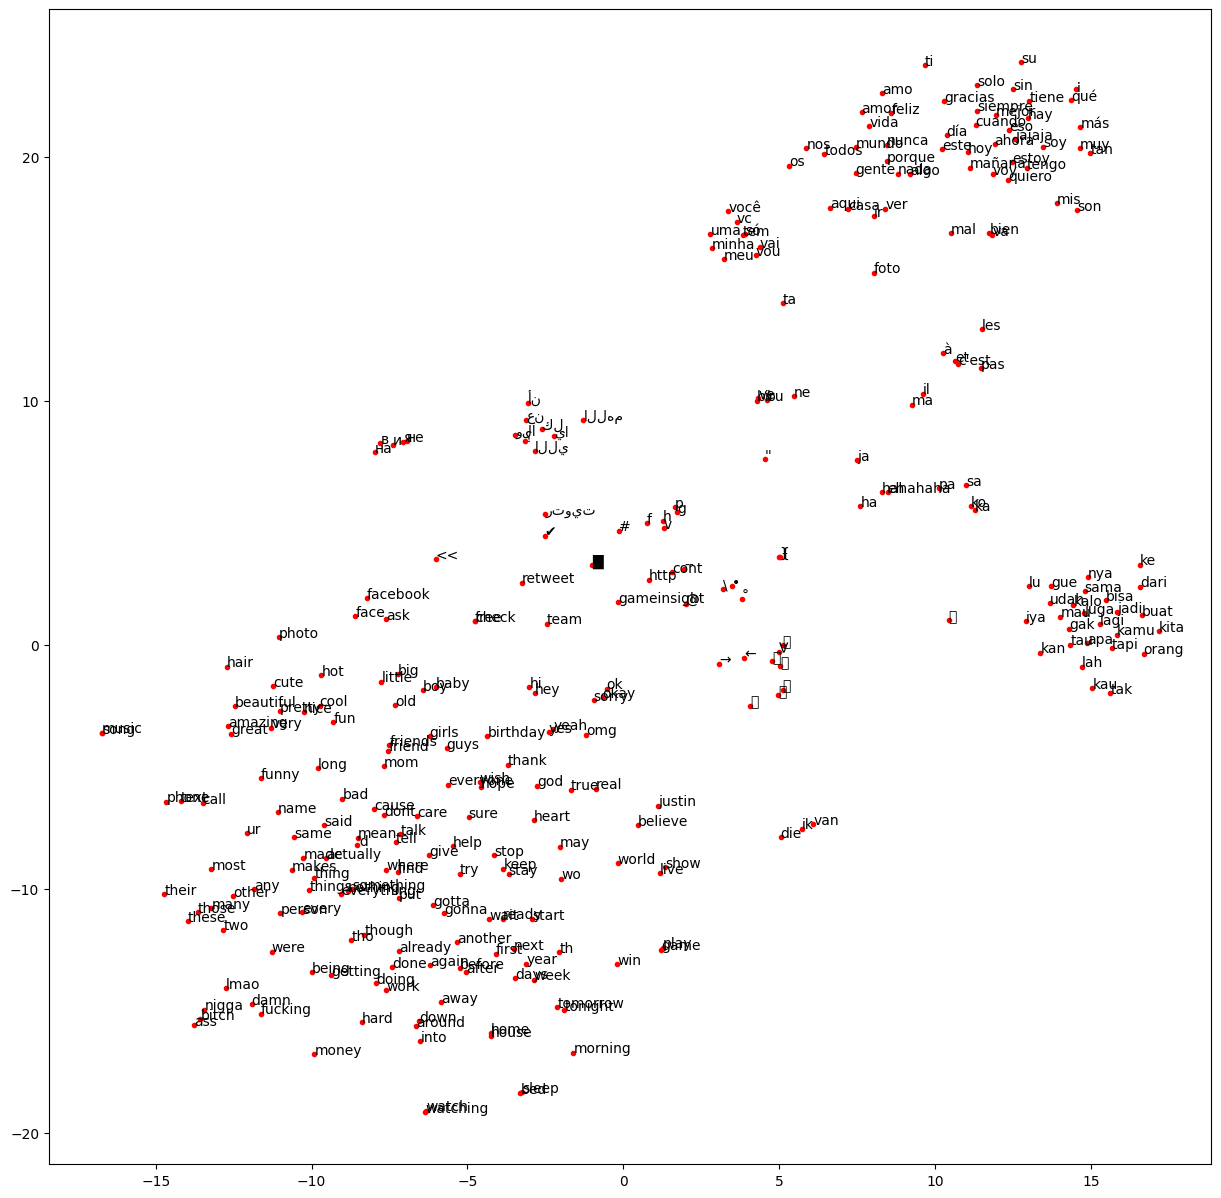

In [278]:
%matplotlib inline
plt.figure(figsize=(15,15))
idx = 0
for a in model2d[:300]:
    w = word_vectors.index_to_key[300+idx]
    plt.plot(a[0],a[1],'r.')
    plt.text(a[0],a[1],w)
    idx += 1
plt.show()